In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df_title = pd.read_pickle('../MLOpsReviews/fichero/df_plataforma.pickle' )
df1 = pd.read_pickle('../MLOpsReviews/fichero/df_score.pickle')

In [2]:
df1.rename(columns={'userId':'User', 'score':'Rating', 'movieId':'movie_id'}, inplace=True)
df_title.rename(columns={'show_id':'Movie_Id', 'title':'Name'}, inplace=True)

In [3]:
df1.head()

,User,Rating,movie_id,timestamp
0,1,1.0,as680,2015-03-09 22:52:09
1,1,4.5,ns2186,2015-03-09 23:07:15
2,1,5.0,hs2381,2015-03-09 22:52:03
3,1,5.0,ns3663,2015-03-09 22:52:26
4,1,5.0,as9500,2015-03-09 22:52:36


In [4]:
df1.shape

(11024289, 4)

In [5]:
df1.dtypes

User                  int64
Rating              float64
movie_id             object
timestamp    datetime64[ns]
dtype: object

In [6]:
df_title.set_index('Movie_Id',inplace=True)
df_title

,Name
Movie_Id,
as1,the grand seduction
as2,take care good night
as3,secrets of deception
as4,pink: staying true
as5,monster maker
...,...
hs2909,the wrong mans
hs2927,the hotwives of orlando
hs2952,all saints (1998)


In [7]:
# Usuarios únicos

print(len(df1['User'].unique()))

115077


In [8]:
# Un usuario puede tener scores para una misma película en fechas distintas
# Por lo tanto me quedo con el promedio de dicho score por cada usuario para una pelicula.
df1['mean_score'] = df1.groupby(['User','movie_id'])['Rating'].transform('mean')

In [9]:
# Elimino las columnas que no voy a usar 
df1.drop(columns=['Rating','timestamp'], inplace=True)
df1.rename(columns={'mean_score':'Rating'}, inplace=True)
df1.head()

,User,movie_id,Rating
0,1,as680,1.0
1,1,ns2186,4.5
2,1,hs2381,5.0
3,1,ns3663,5.0
4,1,as9500,5.0


In [10]:
# Elimino las filas duplicadas
df1.drop_duplicates(ignore_index=True, inplace=True)
df1

,User,movie_id,Rating
0,1,as680,1.0
1,1,ns2186,4.5
2,1,hs2381,5.0
3,1,ns3663,5.0
4,1,as9500,5.0
...,...,...,...
10895195,124380,ns5272,4.5
10895196,124380,ns5492,2.5
10895197,124380,hs305,3.5
10895198,124380,ns7881,4.5


In [11]:
# Calificaciones de películas por usuario

df1_by_users = df1.groupby(['User']).count()
df1_by_users.head()

,movie_id,Rating
User,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


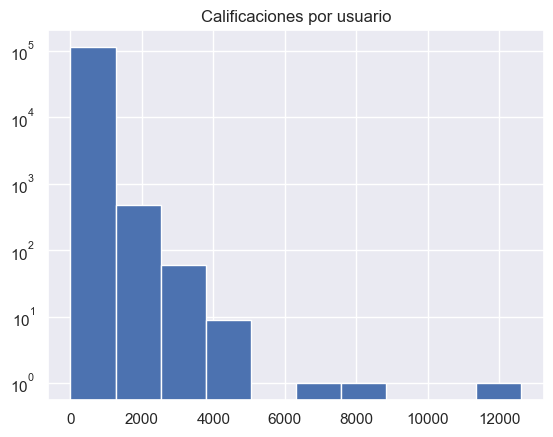

In [12]:
# Calificacion por usuario
plt.hist(df1_by_users.Rating, log= True)
plt.title('Calificaciones por usuario')
plt.show()

In [13]:
# COMPROBACION DE QUE EN CADA CALIFICACION DE USUARIO HAY UNA SOLA PELICULA
df1_by_users.Rating.max()
df1_by_users[df1_by_users['Rating'] == 12619]
# # 12619
# # 45811
print(len(df1[df1['User'] == 45811]['movie_id'].unique()))
print(df1[df1['User'] == 45811].shape[0])

12619
12619


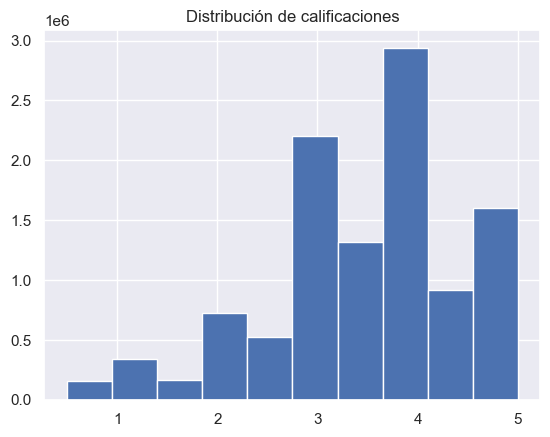

In [14]:
# Observamos la distribución de las calificaciones

df1['Rating'].hist()
plt.title('Distribución de calificaciones')
plt.show()

**Vemos cuál es la película que más calificaciones tiene y cuál la que menos**.

In [15]:
df1_by_movies = df1.groupby(['movie_id']).count()
df1_by_movies.head()

,User,Rating
movie_id,,
as1,497,497
as10,506,506
as100,426,426
as1000,478,478
as1001,464,464


In [16]:
# Pelicula con más calificaciones
idx_max = df1_by_movies['User'].idxmax()
print(df_title.loc[idx_max].Name)

from other worlds


In [17]:
# Pelicula con menos calificaciones
idx_min = df1_by_movies['User'].idxmin()
print(df_title.loc[idx_min].Name)

mitzi (nbc 1968)


### **Películas por popularidad**

In [18]:
df1_by_movies = df1.groupby(['movie_id']).count()
df1_by_movies.sort_values('User', ascending = False, inplace = True)
df1_by_movies['Vistos'] = df1_by_movies['User']
df1_by_movies.drop(columns = ['User','Rating'], inplace = True)
df1_by_movies.head(10)

,Vistos
movie_id,
as4197,563
as9065,554
ns7279,554
as848,553
hs2360,551
hs582,548
as9469,548
as4889,548
as6998,546


In [19]:
df_title.head(3)

,Name
Movie_Id,
as1,the grand seduction
as2,take care good night
as3,secrets of deception


In [20]:
df1_by_movies['Titulo'] = df_title.loc[df1_by_movies.index].Name
df1_by_movies.head()

,Vistos,Titulo
movie_id,,
as4197,563,from other worlds
as9065,554,the organization
ns7279,554,"leapfrog: sing-along, read-along"
as848,553,superbook
hs2360,551,dietland


In [21]:
df1.to_pickle('../MLOpsReviews/fichero/df1.pickle')
df_title.to_pickle('../MLOpsReviews/fichero/df_title.pickle')